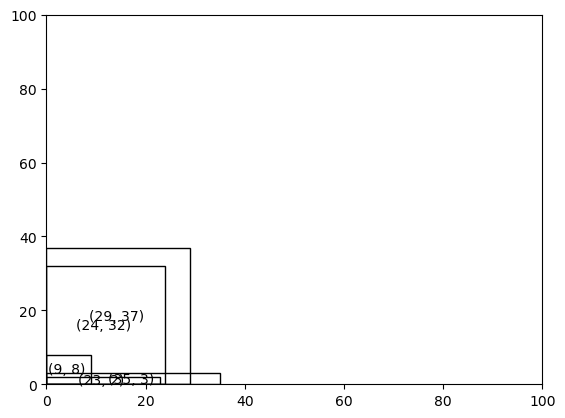

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

class Rectangle:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.rotated = False

    def area(self):
        return self.width * self.height

    def rotate(self):
        self.width, self.height = self.height, self.width
        self.rotated = not self.rotated

class Space:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.rectangles = []

    def place_rectangle(self, rectangle):
        if self.width < rectangle.width or self.height < rectangle.height:
            return False
        if self.width >= rectangle.width and self.height >= rectangle.height:
            self.rectangles.append((rectangle, (0, 0)))
            return True
        if self.width >= rectangle.height and self.height >= rectangle.width:
            rectangle.rotate()
            self.rectangles.append((rectangle, (0, 0)))
            return True
        return self._place_rectangle_recursive(rectangle, 0, 0)

    def _place_rectangle_recursive(self, rectangle, x, y):
        if x + rectangle.width > self.width or y + rectangle.height > self.height:
            return False
        if all(not (rx <= x + rectangle.width and rx + r.width > x and ry <= y + rectangle.height and ry + r.height > y) for r, (rx, ry) in self.rectangles):
            self.rectangles.append((rectangle, (x, y)))
            return True
        mid_x = x + self.width // 2
        mid_y = y + self.height // 2
        if self._place_rectangle_recursive(rectangle, x, y):
            return True
        if self._place_rectangle_recursive(rectangle, mid_x, y):
            return True
        if self._place_rectangle_recursive(rectangle, x, mid_y):
            return True
        if self._place_rectangle_recursive(rectangle, mid_x, mid_y):
            return True
        return False

    def plot(self):
        fig, ax = plt.subplots()
        for rectangle, (x, y) in self.rectangles:
            rect = patches.Rectangle((x, y), rectangle.width, rectangle.height, linewidth=1, edgecolor='black', facecolor='none')
            ax.add_patch(rect)
            ax.text(x + rectangle.width / 2, y + rectangle.height / 2, f"({rectangle.width}, {rectangle.height}) {'R' if rectangle.rotated else ''}", ha='center', va='center')
        ax.set_xlim(0, self.width)
        ax.set_ylim(0, self.height)
        plt.show()

# Generate 5 random rectangles
rectangles = [Rectangle(*[random.randint(1, 50) for _ in range(2)]) for _ in range(5)]

# Create a 100x100 space
space = Space(100, 100)

# Place rectangles in the space
for rectangle in rectangles:
    if not space.place_rectangle(rectangle):
        print("Error: Cannot place rectangle")
        break
else:
    space.plot()